In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib import rc
import os, os.path
mpl.rcParams.update({'font.size': 18})
mpl.rcParams.update({'legend.fontsize': 20})
mpl.rcParams.update({'xtick.labelsize': 13}) 
mpl.rcParams.update({'ytick.labelsize': 13}) 
mpl.rcParams.update({'text.usetex' : False})
rc('font', weight='bold')
colors = {}
colors['C'] = '#1f77b4'
colors['Fe'] = '#ff7f0e'
colors['Pb']=  '#2ca02c'


plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

<ipython-input-14-e01acd11b4fa>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-135, elev=30)


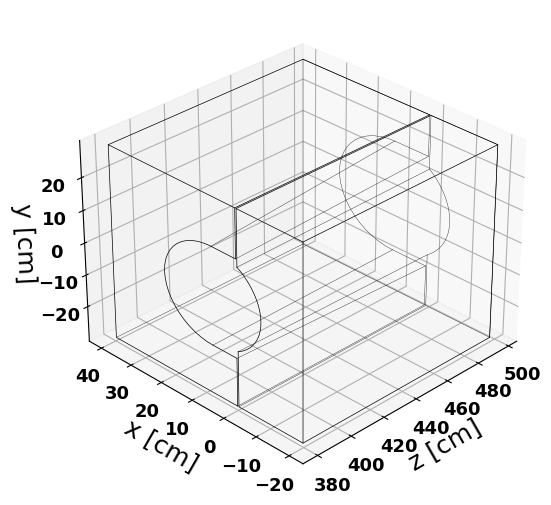

In [14]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, azim=-135, elev=30)

#use different thickness lines for the profiles versus hidden edges
thick=dict(color='k', linewidth=0.5)
thin=dict(color='k', linewidth=0.25)
zmin=380
zmax=380+2.34*50
for holeX, holeR, z,args in (7.7, 15, zmin, thick), (10.55, 17.25, zmax, thin):
    plt.plot([z]*8,[holeX,.2,.2,39.8,39.8, .2, .2, holeX], [-holeR,-holeR,-29.9, -29.9, 29.9, 29.9,holeR, holeR],**args)
    phi = np.linspace(-np.pi/2, np.pi/2, 25)
    plt.plot(0*phi+z,holeX+np.cos(phi)*holeR, holeR*np.sin(phi), **args)
    phi0 = np.arccos((-holeX-.2)/holeR)
    plt.plot([z]*6, [-.2,-.2,-19.8,-19.8, -.2, -.2],  [-holeR*np.sin(phi0),-29.9, -29.9, 29.9, 29.9, holeR*np.sin(phi0)], **args)
    phi = np.linspace(phi0,2*np.pi-phi0, 25)
    plt.plot(0*phi+z, holeX+np.cos(phi)*holeR, holeR*np.sin(phi), **args)
for x in (-19.8, -.2, .2, 39.8):
    for y in (-29.9, 29.9):
        args = thick if y>0 or x<-1 else thin
        plt.plot([zmin, zmax],[x,x], [y,y], **args)

args=thin
plt.plot([zmin, zmax],[.2,.2], [15,17.25], **args)
plt.plot([zmin, zmax],[.2,.2], [-15,-17.25], **args)
plt.plot([zmin, zmax],[7.7,10.55], [15,17.25], **args)
plt.plot([zmin, zmax],[7.7,10.55], [-15,-17.25], **args)
plt.plot([zmin, zmax],[-.2,-.2], [15*np.sin(np.arccos((-7.7-.2)/15)),17.25*np.sin(phi0)], **args)
plt.plot([zmin, zmax],[-.2,-.2], [-15*np.sin(np.arccos((-7.7-.2)/15)),-17.25*np.sin(phi0)], **args)

#outline on the back
plt.plot([zmax, zmax], [39.8,.2], [29.9,29.9], **thick)
plt.plot([zmax, zmax,zmax], [-.2, -19.8, -19.8], [29.9,29.9, -29.9], **thick)
ax.set_xlabel("z [cm]")
ax.set_ylabel("x [cm]")
ax.set_zlabel("y [cm]")

plt.show()